<a href="https://colab.research.google.com/github/Imotep460/FastAIBlog/blob/master/Fast_Ai_kapitel_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fast Ai - kapitel 5**

In [ ]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [ ]:
#hide
from fastbook import *

In [ ]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [ ]:
#hide
Path.BASE_PATH = path

In [ ]:
path.ls()

(#2) [Path('annotations'),Path('images')]

In [ ]:
(path/"images").ls()

(#7393) [Path('images/Birman_183.jpg'),Path('images/Sphynx_125.jpg'),Path('images/Bombay_117.jpg'),Path('images/newfoundland_65.jpg'),Path('images/British_Shorthair_31.jpg'),Path('images/Ragdoll_252.jpg'),Path('images/basset_hound_70.jpg'),Path('images/Persian_30.jpg'),Path('images/pomeranian_137.jpg'),Path('images/Bengal_130.jpg')...]

In [ ]:
fname = (path/"images").ls()[0]

In [ ]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['Birman']

In [ ]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

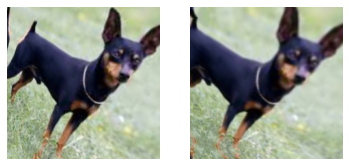

In [ ]:
#hide_input
#id interpolations
#caption A comparison of fastai's data augmentation strategy (left) and the traditional approach (right).
dblock1 = DataBlock(blocks=(ImageBlock(), CategoryBlock()),
                   get_y=parent_label,
                   item_tfms=Resize(460))
# Place an image in the 'images/grizzly.jpg' subfolder where this notebook is located before running this
dls1 = dblock1.dataloaders([(Path.cwd()/'images'/'miniature_pinscher.jpg')]*100, bs=8)
dls1.train.get_idxs = lambda: Inf.ones
x,y = dls1.valid.one_batch()
_,axs = subplots(1, 2)

x1 = TensorImage(x.clone())
x1 = x1.affine_coord(sz=224)
x1 = x1.rotate(draw=30, p=1.)
x1 = x1.zoom(draw=1.2, p=1.)
x1 = x1.warp(draw_x=-0.2, draw_y=0.2, p=1.)

tfms = setup_aug_tfms([Rotate(draw=30, p=1, size=224), Zoom(draw=1.2, p=1., size=224),
                       Warp(draw_x=-0.2, draw_y=0.2, p=1., size=224)])
x = Pipeline(tfms)(x)
#x.affine_coord(coord_tfm=coord_tfm, sz=size, mode=mode, pad_mode=pad_mode)
TensorImage(x[0]).show(ctx=axs[0])
TensorImage(x1[0]).show(ctx=axs[1]);

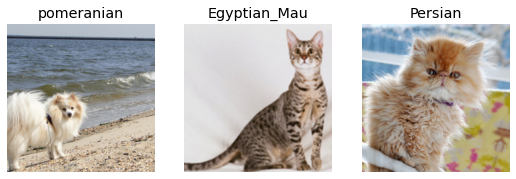

In [ ]:
dls.show_batch(nrows=1, ncols=3)

In [ ]:
#hide_output
pets1 = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                  item_tfms=Resize(460),
                  batch_tfms=aug_transforms(size=224, min_scale=0.75))
pets1.summary(path/"images")

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/basset_hound_51.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=333x500
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/basset_hound_51.jpg
    applying partial gives
      basset_hound
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(14)

Final sample: (PILImage mode=RGB size=333x500, TensorCategory(14))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up afte

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.463172,1.101596,0.339648,01:55


epoch,train_loss,valid_loss,error_rate,time
0,0.507639,1.001056,0.294317,02:27
1,0.330711,0.841297,0.254398,02:27


In [ ]:
x,y = dls.one_batch()

In [ ]:
y

TensorCategory([ 7,  7,  0, 10,  5, 12, 19,  0, 24, 35,  6, 19, 33,  9, 27, 27, 34, 13, 11, 34, 11, 19, 18, 35, 31, 33, 34, 27,  4, 32, 34, 19, 12, 16, 17,  0, 11, 23, 29, 13, 25, 14, 36, 31,  5, 29, 12, 23,
        22, 28,  4, 30, 25, 16, 17, 20, 24,  8,  4, 27, 34, 25, 19, 11], device='cuda:0')

In [ ]:
preds,_ = learn.get_preds(dl=[(x,y)])
preds[0]

tensor([1.3026e-08, 4.1057e-08, 2.1229e-06, 1.3474e-08, 5.7301e-06, 8.5949e-09, 2.8635e-04, 9.9957e-01, 1.0431e-05, 8.2644e-08, 3.1241e-09, 3.8788e-08, 3.1625e-08, 3.9096e-08, 3.8911e-08, 4.1528e-08,
        2.3954e-08, 5.3725e-09, 6.2817e-08, 1.8606e-08, 3.3789e-08, 2.4073e-07, 1.0377e-04, 7.2735e-07, 6.6701e-07, 6.4277e-07, 7.1024e-09, 4.2683e-07, 1.2703e-05, 3.6499e-08, 4.7538e-08, 1.7708e-06,
        7.3165e-08, 2.0073e-07, 1.9836e-08, 4.8690e-07, 6.4921e-07])

In [ ]:
len(preds[0]),preds[0].sum()

(37, tensor(1.0000))

/usr/local/lib/python3.7/dist-packages/fastbook/__init__.py:73: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /pytorch/aten/src/ATen/native/RangeFactories.cpp:23.)
  x = torch.linspace(min,max)


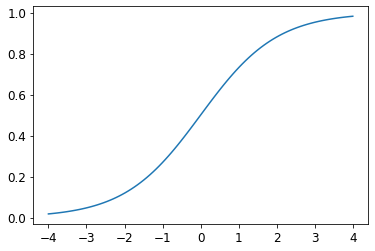

In [ ]:
plot_function(torch.sigmoid, min=-4,max=4)

In [ ]:
#hide
torch.random.manual_seed(42);

In [ ]:
acts = torch.randn((6,2))*2
acts

tensor([[ 0.6734,  0.2576],
        [ 0.4689,  0.4607],
        [-2.2457, -0.3727],
        [ 4.4164, -1.2760],
        [ 0.9233,  0.5347],
        [ 1.0698,  1.6187]])

In [ ]:
acts.sigmoid()

tensor([[0.6623, 0.5641],
        [0.6151, 0.6132],
        [0.0957, 0.4079],
        [0.9881, 0.2182],
        [0.7157, 0.6306],
        [0.7446, 0.8346]])

In [ ]:
(acts[:,0]-acts[:,1]).sigmoid()

tensor([0.6025, 0.5021, 0.1332, 0.9966, 0.5959, 0.3661])

In [ ]:
sm_acts = torch.softmax(acts, dim=1)
sm_acts

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

In [ ]:
targ = tensor([0,1,0,1,1,0])

In [ ]:
sm_acts

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

In [ ]:
idx = range(6)
sm_acts[idx, targ]

tensor([0.6025, 0.4979, 0.1332, 0.0034, 0.4041, 0.3661])

In [ ]:
#hide_input
from IPython.display import HTML
df = pd.DataFrame(sm_acts, columns=["3","7"])
df['targ'] = targ
df['idx'] = idx
df['loss'] = sm_acts[range(6), targ]
t = df.style.hide_index()
#To have html code compatible with our script
html = t._repr_html_().split('</style>')[1]
html = re.sub(r'<table id="([^"]+)"\s*>', r'<table >', html)
display(HTML(html))

3,7,targ,idx,loss
0.602469,0.397531,0,0,0.602469
0.502065,0.497935,1,1,0.497935
0.133188,0.866811,0,2,0.133188
0.996640,0.003360,1,3,0.003360
0.595949,0.404051,1,4,0.404051
0.366118,0.633882,0,5,0.366118


In [ ]:
-sm_acts[idx, targ]

tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

In [ ]:
F.nll_loss(sm_acts, targ, reduction='none')

tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

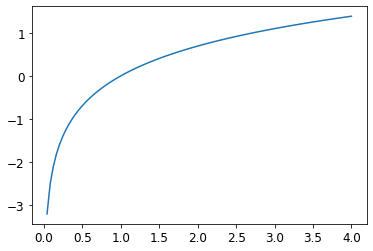

In [ ]:
plot_function(torch.log, min=0,max=4)

In [ ]:
loss_func = nn.CrossEntropyLoss()

In [ ]:
F.cross_entropy(acts, targ)

tensor(1.8045)

In [ ]:
nn.CrossEntropyLoss(reduction='none')(acts, targ)

tensor([0.5067, 0.6973, 2.0160, 5.6958, 0.9062, 1.0048])

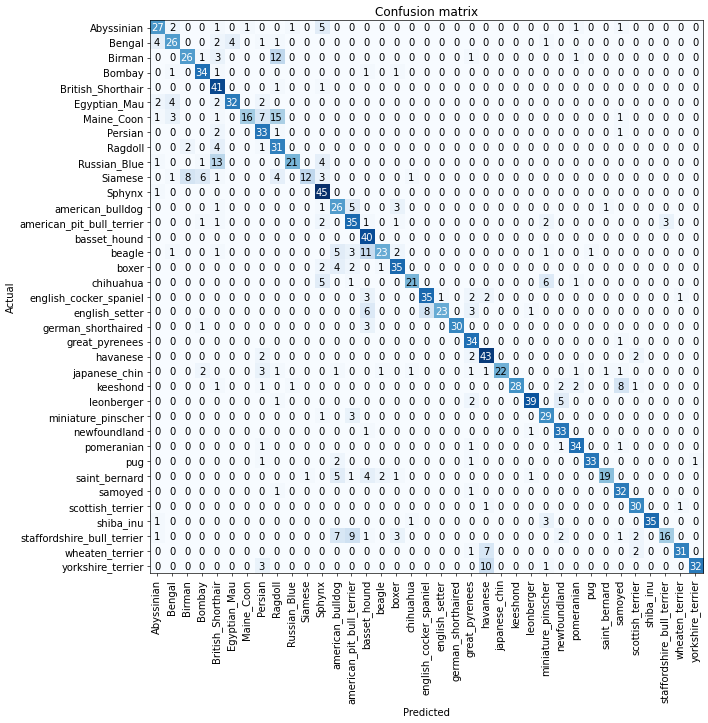

In [ ]:
#width 600
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=5)

[('Maine_Coon', 'Ragdoll', 15),
 ('Russian_Blue', 'British_Shorthair', 13),
 ('Birman', 'Ragdoll', 12),
 ('beagle', 'basset_hound', 11),
 ('yorkshire_terrier', 'havanese', 10),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 9),
 ('Siamese', 'Birman', 8),
 ('english_setter', 'english_cocker_spaniel', 8),
 ('keeshond', 'samoyed', 8),
 ('Maine_Coon', 'Persian', 7),
 ('staffordshire_bull_terrier', 'american_bulldog', 7),
 ('wheaten_terrier', 'havanese', 7),
 ('Siamese', 'Bombay', 6),
 ('chihuahua', 'miniature_pinscher', 6),
 ('english_setter', 'basset_hound', 6),
 ('Abyssinian', 'Sphynx', 5),
 ('american_bulldog', 'american_pit_bull_terrier', 5),
 ('beagle', 'american_bulldog', 5),
 ('chihuahua', 'Sphynx', 5),
 ('leonberger', 'newfoundland', 5),
 ('saint_bernard', 'american_bulldog', 5)]

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1, base_lr=0.1)

epoch,train_loss,valid_loss,error_rate,time
0,2.641252,10.990454,0.837618,01:56


epoch,train_loss,valid_loss,error_rate,time
0,3.699024,3.996556,0.953992,02:29


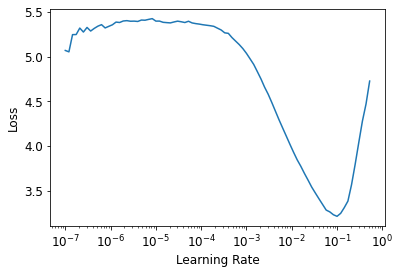

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
lr_min,lr_steep = learn.lr_find()

In [ ]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 1.00e-02, steepest point: 3.63e-03


In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.347023,0.981549,0.288227,01:55


epoch,train_loss,valid_loss,error_rate,time
0,0.566394,1.174068,0.330176,02:29
1,0.334773,0.752081,0.225304,02:29


In [ ]:
learn.fine_tune??

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.104290,0.933496,0.271989,01:56
1,0.547801,0.765140,0.230717,01:55
2,0.327906,0.682352,0.209743,01:55


In [ ]:
learn.unfreeze()

SuggestedLRs(lr_min=9.999999747378752e-07, lr_steep=2.2908675418875646e-06)

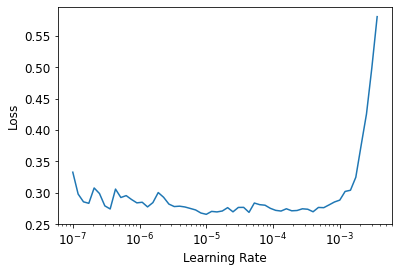

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.258392,0.652376,0.200947,02:27
1,0.242147,0.618082,0.189445,02:27
2,0.231463,0.622283,0.196888,02:27
3,0.204535,0.595082,0.188092,02:27
4,0.180945,0.592548,0.186062,02:27
5,0.171708,0.603632,0.192828,02:28


In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.124157,0.991350,0.308525,01:55
1,0.527673,0.893586,0.282138,01:55
2,0.339577,0.801603,0.253721,01:54


epoch,train_loss,valid_loss,error_rate,time
0,0.272625,0.764421,0.238836,02:26
1,0.260812,0.761544,0.242896,02:26
2,0.229428,0.696853,0.222598,02:26
3,0.226262,0.675862,0.219215,02:29
4,0.189527,0.686940,0.220568,02:29
5,0.173371,0.682683,0.218539,02:29
6,0.165010,0.650099,0.208390,02:29
7,0.161229,0.651157,0.209743,02:29
8,0.138687,0.640442,0.203654,02:29
9,0.127961,0.651706,0.202300,02:29


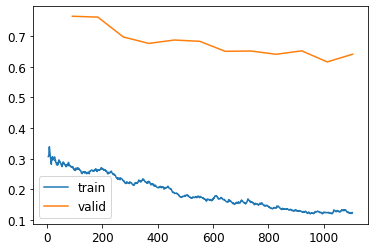

In [ ]:
learn.recorder.plot_loss()

In [ ]:
from fastai.callback.fp16 import *
learn = cnn_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn.fine_tune(6, freeze_epochs=3)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.264476,1.317010,0.381597,02:17
1,0.602886,1.197397,0.348444,02:16
2,0.430401,1.302739,0.358593,02:16


epoch,train_loss,valid_loss,error_rate,time
0,0.267705,1.193918,0.342355,02:57
1,0.333476,1.369267,0.364005,02:57
2,0.258500,1.029740,0.303112,02:57
3,0.147498,0.883164,0.253721,02:57
4,0.085893,0.760042,0.224628,02:57
5,0.052952,0.767537,0.227334,02:56
